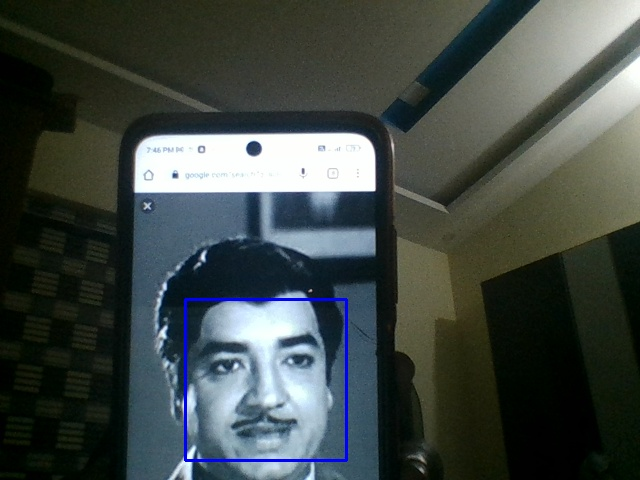

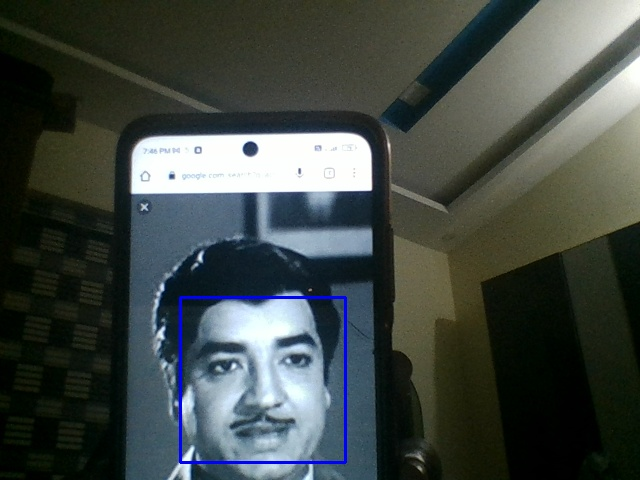

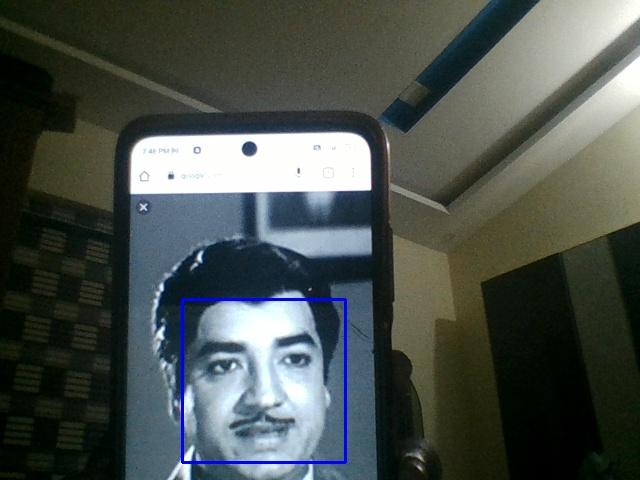

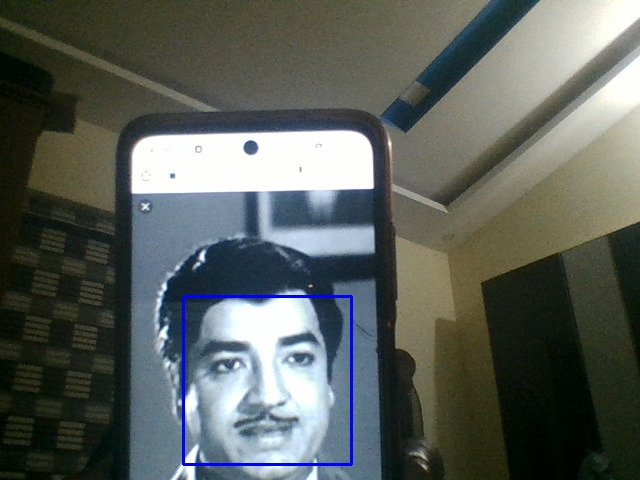

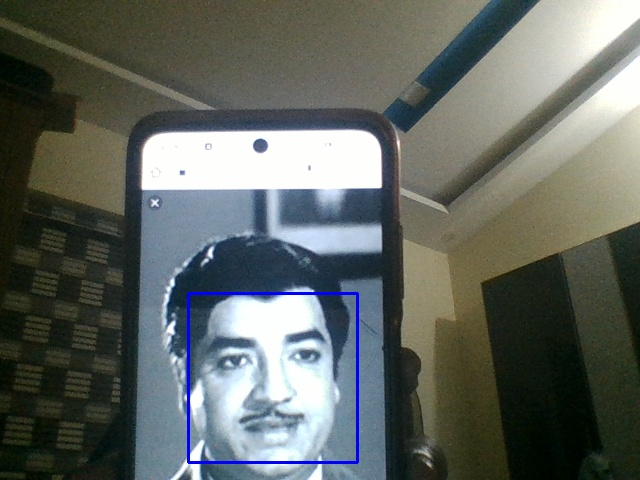

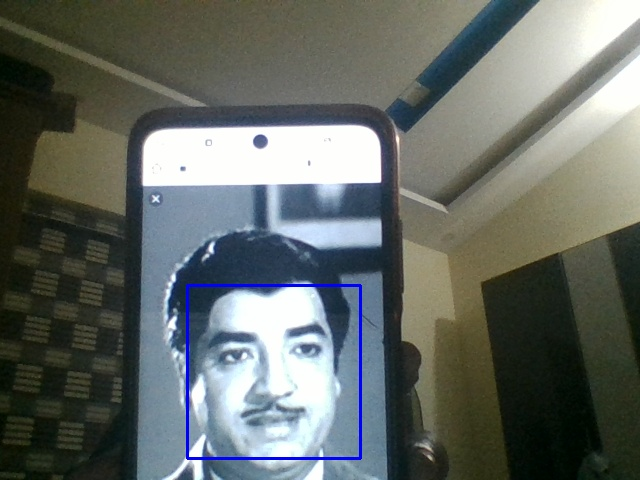

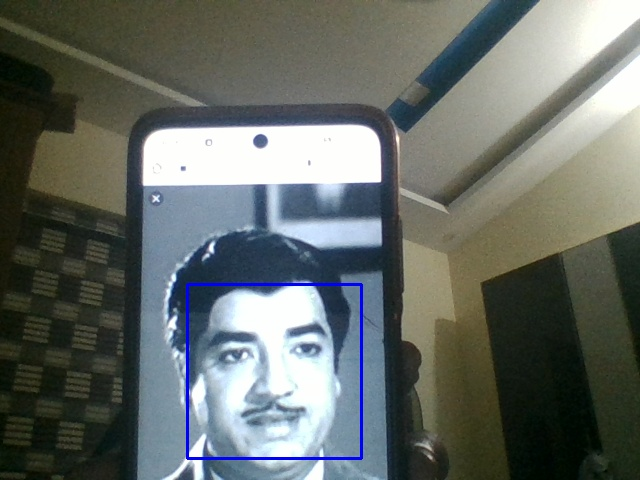

In [6]:
import cv2
import numpy as np
from IPython.display import display, Image
import time

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

# Set the duration to capture frames (in seconds)
capture_duration = 1
end_time = time.time() + capture_duration

frames = []

while time.time() < end_time:
    ret, frame = cap.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    frames.append(frame)

cap.release()
cv2.destroyAllWindows()

# Display captured frames as a sequence of images
for frame in frames:
    ret, buffer = cv2.imencode('.jpg', frame)
    frame_as_image = buffer.tobytes()
    display(Image(data=frame_as_image))
